<a href="https://colab.research.google.com/github/talanthier/Math-152/blob/main/EpidemiologyG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coronavirus: Humanities Last Stand


##Denali Wilson, Angelly Aquise, Conrad Ainslie, Hadar Goldstein, Timothy Lanthier

###Introduction:

###Baseline Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def baseline_model(N = 1000000, I = 100, recovery = 0.5, infection = 1, t=30):
  '''
  Models the spread of a disease over a given time period. Returns the results as a
  numpy array with time, number susceptible, number infected, and number recovered as
  the columns. One row for each day.

  N : Total Population
  I : Initial Infected Population
  recovery : recovery rate (% of infected people recovering each day)
  infection : expected number of people infected by each infected person each day
  t : time in days
  '''
  S=N-I #Susceptible population
  R=0 #Recovered population
  results = np.array([0,S,I,R]) # Stores data in numpy array
  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I) 
    R+=(recovery*I) #no temp variable needed
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R])) # adds new row to our results array
  return results



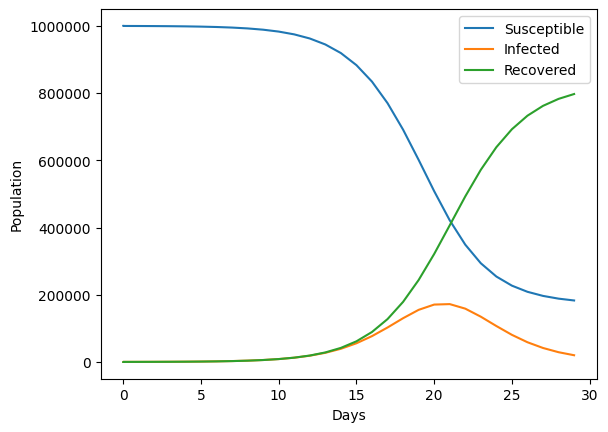

In [3]:
data = baseline_model(t = 30)

plt.style.use('default')
plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Population')
plt.ticklabel_format(style='plain')

### Effect of the Basic Reproduction Number

In our model, the Basic Reproduction Number is defined as the ratio $\frac{\beta}{\gamma}$ where $\beta$ is the expected number of people infected by each infected person each day and $\gamma$ is the proportion of infected individuals recovering each day. In our `baseline_model` function, $\beta$ and $\gamma$ are denoted by `infection` and `recovery` respectively. In this section, we're going to investigate the effect different values for the Basic Reproduction Number has on our model.

In order to keep our model consistent, we're going to set the total population to $1{,}000{,}000$ and the starting infected population to $100$. 

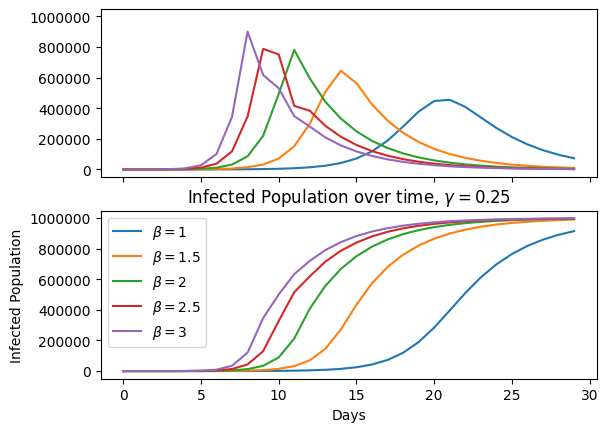

In [29]:
def plot_rep_num(beta, gamma):
  '''Plots for given recovery and infection rates (beta and gamma respectively).'''
  data = baseline_model(recovery = gamma, infection = beta)
  plt.plot(data[:,0],data[:,1], label = 'Susceptible')
  plt.plot(data[:,0],data[:,2], label = 'Infected')
  plt.plot(data[:,0],data[:,3], label = 'Recovered')
  plt.legend()
  plt.xlabel('Days')
  plt.ylabel('Population')
  plt.ticklabel_format(style='plain')
  plt.title('Beta = {}, Gamma = {}, BRP = {}'.format(beta, gamma, beta/gamma))
  plt.show()

def plot_brn(beta_list = [1,1.5,2,2.5,3], gamma = 0.25):
  # Holding gamma constant, we're going to plot different the infected population for different betas on the same axis.
  for i in beta_list:
    temp_results = baseline_model(N = 1000000, I = 10, recovery = gamma, infection = i)
    plt.plot(temp_results[:,0], temp_results[:,2], label = r'$\beta = ${}'.format(i))
  plt.xlabel('Days')
  plt.ylabel('Infected Population')
  plt.ticklabel_format(style='plain')
  plt.legend()
  plt.title(r'Infected Population over time, $\gamma = {}$'.format(gamma))
  plt.show()
  for j in beta_list:
    temp_results = baseline_model(N = 1000000, I = 10, recovery = gamma, infection = j)
    plt.plot(temp_results[:,0], temp_results[:,3], label = r'$\beta = ${}'.format(j))
  plt.xlabel('Days')
  plt.ylabel('Recovered Population')
  plt.ticklabel_format(style='plain')
  plt.legend()
  plt.title(r'Recovered Population over time, $\gamma = {}$'.format(gamma))
  plt.show()

def plot_brn2(beta_list = [1,1.5,2,2.5,3], gamma = 0.25):
  fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
  for i in beta_list:
    temp_results = baseline_model(N = 1000000, I = 10, recovery = gamma, infection = i)
    ax1.plot(temp_results[:,0], temp_results[:,2], label = r'$\beta = ${}'.format(i))
    ax2.plot(temp_results[:,0], temp_results[:,3], label = r'$\beta = ${}'.format(i))
  plt.xlabel('Days')
  plt.ylabel('Infected Population')
  plt.ticklabel_format(style='plain')
  plt.legend()
  plt.title(r'Infected Population over time, $\gamma = {}$'.format(gamma))
  plt.show()

def plot_fig():
  fig, ax = plt.subplots(3,3, sharex = True, sharey = True)
  plt.ticklabel_format(style = 'plain')
  for i in range(3):
    for j in range(3):
      results = baseline_model(recovery = temp_recovery, infection = j)
      ax[i,j].plot(results[:,0], results[:,1], label = 'Susceptible')
      ax[i,j].plot(results[:,0], results[:,2], label = 'Infected')
      ax[i,j].plot(results[:,0], results[:,3], label = 'Recovered')

#plot_rep_num(1, 0.25)
#plot_rep_num(1, 0.5)
#plot_rep_num(1, 0.75)

plot_brn2()


Initilization:


In [ ]:
#init function here 


Caclulations:

In [ ]:
#calc function here 

Plot Function:


In [ ]:
#Plot function here

###Conclusion

#Below this text is the playground free play area, do whatever 


In [ ]:
#Exploration of Epidemic Modeling
#Group members: Denali Wilson, Angelly Aquise, Conrad Ainslie, Hadar Goldstein, Timothy Lanthier

#TODO
#Write  plaintext Introduction
#Write code for single clean model
#write code for fancier model w/ features
#write plaintext Conclusion


test block can you guys see this??

In [ ]:


def model_disease(t):
  #Declaring initial values of system variables
  N=1000000 #Total population
  S=999000 #Susceptible population
  I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  recovery=.5 #%of sick people recovering daily (denoted gamma)
  infection=1 # amount of people infected per person per day (denoted beta)

  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I) 
    R+=(recovery*I) #no temp variable needed
    S=Splus #temporary variables are updated
    I=Iplus
  print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  print('SumCheck: {}'.format(S+I+R))
#for x in range(0, 30, 1):  #iterating function to see behaviour over time
  #model_disease(x)
  

The below model was created in order to explore the effects of Masked/Unmasked populations in the model. This can also be generalized to refer to any groups with different rates of infection. I split the susceptible population

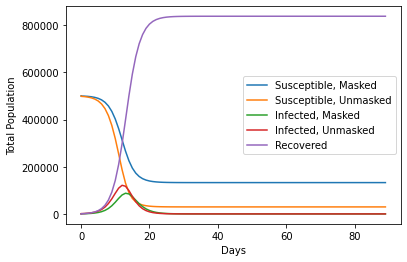

In [ ]:
#Experimenting with masked/nonmasked populations with different rates of infection/infectivity

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(t):
  #Declaring initial values of system variables
  N=1000000 #Total population 
  S_mask=500000 #Mask wearing, susceptible population
  S_no_mask=499000 #Non mask wearing, susceptible population
  I_mask=0 #Mask wearing, Infected population
  I_no_mask=1000 #Mask-averse, 
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  recovery=.5 #%of sick people recovering daily (denoted gamma)
  infection=1.5 # amount of people infected per person per day (denoted beta)
  infection_masked=.5*infection
  results = np.array([0,S_mask,S_no_mask,I_mask,I_no_mask,R])

  for x in range(t): #updating population variables according to equations t times
    I=I_no_mask+I_mask
    S_mask_plus=S_mask-(infection_masked*I*S_mask/N)
    S_no_mask_plus=S_no_mask-(infection*I*S_no_mask/N)
    I_mask_plus=I_mask+(infection_masked*I*S_mask/N)-(recovery*I_mask) 
    I_no_mask_plus=I_no_mask+(infection*I*S_no_mask/N)-(recovery*I_no_mask)
    R+=(recovery*I_mask)+(recovery*I_no_mask) #no temp variable needed
    S_mask=S_mask_plus #temporary variables are updated
    S_no_mask=S_no_mask_plus
    I_mask=I_mask_plus
    I_no_mask=I_no_mask_plus
    results = np.vstack((results,[x,S_mask,S_no_mask,I_mask,I_no_mask,R])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results
data = model_disease(90)
plt.plot(data[:,0],data[:,1], label = 'Susceptible, Masked')
plt.plot(data[:,0],data[:,2], label = 'Susceptible, Unmasked')
plt.plot(data[:,0],data[:,3], label = 'Infected, Masked')
plt.plot(data[:,0],data[:,4], label = 'Infected, Unmasked')
plt.plot(data[:,0],data[:,5], label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.show()

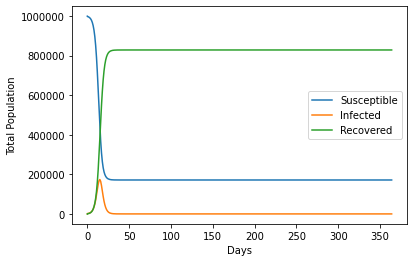

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(N = 1000000, I = 1000, recovery = 0.5, infection = 1, t=30):
  #Declaring initial values of system variables
  #N=1000000 #Total population 
  S=N-I #Susceptible population
  #I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  #recovery=.5 #%of sick people recovering daily (denoted gamma)
  #infection=1 # amount of people infected per person per day (denoted beta)
  results = np.array([0,S,I,R])

  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I) 
    R+=(recovery*I) #no temp variable needed
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results

def pandemic_length(results): # finds time where there are no more infected people
    for i in range(len(results)-1):
        if results[i,2] < 1: # accounts for data being real numbers (not integers)
            return i
    print('Try wider time range.')
    return None

data = model_disease(t=365)
length = pandemic_length(data)

plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.show()

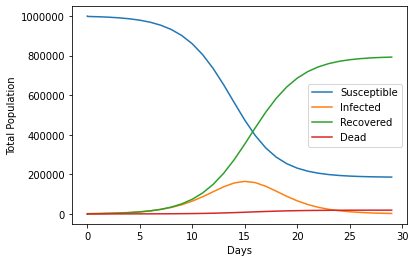

In [ ]:
#plot including deaths 

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(t):
  #Declaring initial values of system variables
  N=1000000 #Total population 
  S=999000 #Susceptible population
  I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  D=0 #dead population
  recovery=.5 #%of sick people recovering daily (denoted gamma)
  infection=1 # amount of people infected per person per day (denoted beta)
  death=.012 #% of sick people dying from disease 
  results = np.array([0,S,I,R,D]) # columns 

  for x in range(t): #updating population variables according to equations t times
    Splus=S-(infection*I*S/N)
    Iplus=I+(infection*I*S/N)-(recovery*I)-(death*I) #infected decrease as deaths occur
    R+=(recovery*I) #no temp variable needed
    D+=(death*I) #track deaths 
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R,D])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results
data = model_disease(30)

plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.plot(data[:,0],data[:,4], label = 'Dead')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.show()

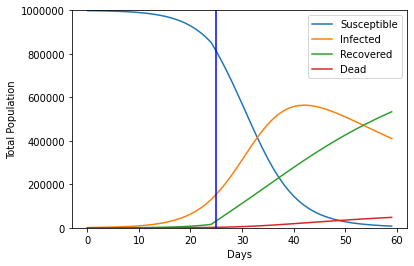

In [ ]:
#plot including deaths and vaccine

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def model_disease(t):
  #Declaring initial values of system variables
  N=1000000 #Total population 
  S=999000 #Susceptible population
  I=1000 #Infected population
  R=0 #Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  D=0 #dead population
  Vprog=.04 #% of progress made on vaccine per day
  Vrate=.015*N #% of people who get vaccinated each day, based on max pop.
  recovery=.025 #%of sick people recovering daily (denoted gamma)
  infection=.25 # amount of people infected per person per day (denoted beta)
  death=.003 #% of sick people dying from disease 
  results = np.array([0,S,I,R,D])
  Vsum=0
  for x in range(t): #updating population variables according to equations t times
    if Vsum>1:
      Splus=S-(infection*I*S/N)-Vrate*S/N #Sus people becoming vaccinated
      R+=(recovery*I)+Vrate*S/N #^^^
    else:
      Splus=S-(infection*I*S/N)
      R+=(recovery*I) 
      Vsum+=Vprog #keeping track of vaccine progress, not needed after finished.
    Iplus=I+(infection*I*S/N)-(recovery*I)-(death*I)
    D+=(death*I)
    S=Splus #temporary variables are updated
    I=Iplus
    results = np.vstack((results,[x,S,I,R,D])) # adds new row to our results array
  #print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, S, I, R))
  #print('SumCheck: {}'.format(S+I+R))
  return results
data = model_disease(60)

plt.plot(data[:,0],data[:,1], label = 'Susceptible')
plt.plot(data[:,0],data[:,2], label = 'Infected')
plt.plot(data[:,0],data[:,3], label = 'Recovered')
plt.plot(data[:,0],data[:,4], label = 'Dead')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain')
plt.ylim((0,1000000)) #will have to change if max pop changes, but thats currently not a accessable variable.
plt.axvline(x=1/.04, color='b') #has to be changed based on Vprog, its x=1/Vprog
plt.show()

In [ ]:
def model_initialization(totalpop,numInf,gamma,beta): #creates a list of 6 items, with the values needed to run model, if we need to add a new variable, append it to the end of the list
  #Declaring initial values of model variables
  Model=[]
  Model.append(totalpop) # Total population
  Model.append(numInf) # Infected population
  Model.append(totalpop-numInf) # Susceptible population
  Model.append(0) # Recovered population (Given equations assume recovered population are no longer susceptible, could be interesting to explore changing that)
  Model.append(gamma) # %of sick people recovering daily (denoted gamma)
  Model.append(beta) # amount of people infected per person per day (denoted beta)
  Model.append(0) # days since init
  #refrence key
    #model[0] is Total population
    #model[1] is Infected population
    #model[2] is Susceptible population
    #model[3] is Recovered population 
    #model[4] is % of sick people recovering daily 
    #model[5] is amount of people infected per person per day
    #model[6] is amount of time has passed in the model
  return Model

def Time_passage(mdl,t): #input list created by func model_initialization and time in days 
  for x in range(t): #updating population variables according to equations t times (simulates t days)
    Splus=mdl[2]+(-1*mdl[5]*mdl[1]*mdl[2]/mdl[0])//1 #Use // as if half your body's infected your whole bodies infected. 
    Iplus=mdl[1]-(-1*mdl[5]*mdl[1]*mdl[2]/mdl[0])//1-(mdl[4]*mdl[1])//1 #the strange -(-1*... is a lazy way to round up while adding. 
    mdl[3] += (mdl[4]*mdl[1]//1) #no temp variable needed, // is used to round properly 
    mdl[2] = Splus #temporary variables are updated 
    mdl[1] = Iplus
    #print('Splus is' , Splus) 
    #print('Iplus is', Iplus) 
    mdl[6]+=1 #so each model has a record of how many days its been running 
  print("After {} years and {} days, there are:\n {} Susceptible\n {} Infected\n {} Recovered".format(t//365, t%365, mdl[2], mdl[1], mdl[3]))

  M1=model_initialization(1000000,1000,.5,1) 
  Time_passage(M1,31)
  print(M1[3]+M1[2]+M1[1],M1[6]) #kept on losing people due to rounding errors
